In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

main_df = pd.read_csv('titanic_data/train.csv')

## Analyzing the Training Dataset

In [76]:
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
main_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [78]:
main_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived,Sex'>

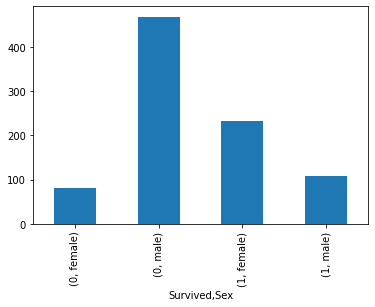

In [79]:
main_df.groupby(['Survived','Sex']).count()['PassengerId'].plot(kind='bar')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

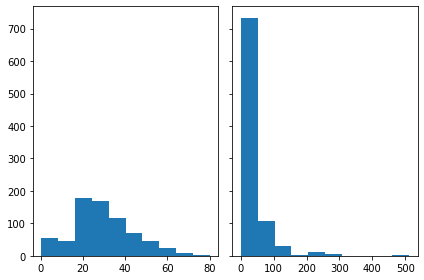

In [80]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(main_df['Age'], bins=10)
axs[1].hist(main_df['Fare'], bins=10)

## Training Model

In [81]:
print("Missing training data:")
display(main_df.isnull().sum())

Missing training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
main_df['Age'] = main_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
main_df = main_df.drop(['Cabin', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1)
main_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [83]:
X = main_df.drop(['Survived'], axis=1)
y = main_df['Survived']

In [84]:
X = pd.get_dummies(X)

In [85]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
clftree = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features=None)
pipeline = Pipeline(steps=[('classifier', clftree)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [87]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy Score', accuracy_score(y_test, y_pred))

Accuracy Score 0.8044692737430168


## Exporting Model

In [88]:
# Export the model
import pickle
pickle.dump(pipeline, open('titanic_data/model.pkl','wb'))

## Export Test Data

In [89]:
test_df = X_test
test_df['Survived'] = y_test
test_df.head()
test_df.to_csv(r'titanic_data/test.csv')

## Train and Export Group Unaware Model

In [90]:
X = main_df.drop(['Survived', 'Sex'], axis=1)
y = main_df['Survived']
X = pd.get_dummies(X)
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
clftree_unaware = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features=None)
pipeline_unaware = Pipeline(steps=[('classifier', clftree_unaware)])
pipeline_unaware.fit(X_train, y_train)
y_pred = pipeline_unaware.predict(X_test)

In [92]:
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy Score', accuracy_score(y_test, y_pred))

Accuracy Score 0.7430167597765364


In [93]:
pickle.dump(pipeline_unaware, open('titanic_data/model_unaware.pkl','wb'))